# Discrete Fourier Transform and Interpolation

1. Approximate Fourier series: (assume $n = 2m+1$ is odd)
$$
f_{-m:m}(θ) = \sum_{k=-m}^m \hat f_k^n {\rm e}^{{\rm i}kθ}
$$
2. Approximate Taylor series:
$$
f_n(θ) = \sum_{k=0}^{n-1} \hat f_k^n {\rm e}^{{\rm i}kθ}
$$

In [18]:
using LinearAlgebra, Plots

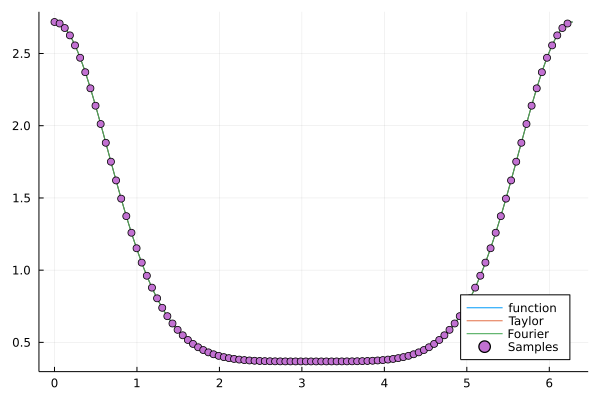

In [65]:
m = 50
n = 2m+1

θ = range(0, 2π; length=n+1)[1:end-1]

Q = 1/sqrt(n) * [exp(-im*(k*θ[j])) for k=0:n-1, j=1:n]

Q'Q ≈ I

## WARNING: A' is the adjoint (conjugate transpose)
Q' == conj(transpose(Q))


f = θ -> exp(exp(im*θ))
𝐟̂ = 1/sqrt(n) * Q * f.(θ)

# approximate Taylor series
fₙ = θ ->  transpose(exp.(im*θ*(0:n-1))) * 𝐟̂

𝐟̂ₘ = [𝐟̂[m+2:end]; 𝐟̂[1:m+1]]


fₘ = θ ->  transpose(exp.(im*θ*(-m:m))) * 𝐟̂ₘ

# plotting grid
g = range(0, 2π; length=1000)

plot(g, real.(f.(g)); legend=:bottomright, label="function")
plot!(g, real.(fₙ.(g)); label="Taylor")
plot!(g, real.(fₘ.(g)), label="Fourier")
scatter!(θ, real.(f.(θ)), label="Samples")

# Conclusion: approximate Fourier/Taylor always interpolate. Taylor will diverge unless
# f has only non-negative.

7-element Vector{Float64}:
 2.718281828459045
 1.865426665240623
 0.8004982489794523
 0.40617593821005477
 0.4061759382100547
 0.8004982489794521
 1.8654266652406226